# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1921]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

*Commenting the above code, as these are older version and throws an error*

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1924]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In addition to importing libraries, I've added 2 more lines of codes for-

1. `%matplotlib inline` : Command to tell Python to actually display the graphs inline i.e. immediately below the code cell.
2. `Using pd.set_option,display.float_format and lambda function` : to restrict the float value to 3 decimal places for cleaner and better readability.<br>
For example without this the mean value for column `food_preparation_time` will be displayed as scientific notation something like this 2.737197e+01.

### Understanding the structure of the data

In [1927]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

**Importing the dataset**

In [1929]:
# Write your code here to read the data
df = pd.read_csv('foodhub_order.csv') #using pd.read_csv will read the csv files present in the given location(here they are in same folder)

**Displaying the first 5 rows of the dataset**

In [1931]:
# Write your code here to view the first 5 rows
# using head() function 
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


The `head()` function will display first 5 rows of the foodhub dataset here.

In [1933]:
# Display the last 5 rows
df.tail() #using tail() function will return last 5 rows

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.310,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.180,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.220,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.180,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.450,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [1935]:
# Using shape attributes we can determine the number of rows and columns present in the dataset
df.shape 
# displaying the result in more readable form
print('There are',df.shape[0],'rows and',df.shape[1],'columns present in the dataset')

There are 1898 rows and 9 columns present in the dataset


#### Observations:
- *There are `1898 rows` and `9 columns` present in the dataset*


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [1938]:
# Write your code here
df.info() #using info() function to display datatypes of the different columns. It also provide informations on missing data in any columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We can observe from the above results that, 

- There are total of 9 columns in this dataset of datatypes `integer(4),float(1) and object(4)`.
- There are 5 numerical columns. The column `order_id`,`customer_id`,`food_preparation_time` and `delivery_time` are stored as an`integer` while `cost_of_the_order` is stored as a float variable since dollars and cents value required a decimal placing. 
- The remaining 4 columns `restaurant_name`,`cusine_type`,`day_of_week` and `rating` are categorical data and stored as an object(string).
- Also we can notice that the `rating` column is stored as an object as it contains both number(4,5 etc) as well as 'Not given' string value. but for performing any statistical or numerical operations later in our analysis, we may have to convert it to type integer.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [1941]:
# Write your code here
df.isnull().sum() #by checking the column value using isnull() fn and applying sum fn on that

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

* We can observe from the above result set and also from df.info() that there are `no missing data present` in the this Dataset.
* There are `1898 non-null value` for all the columns also indicate no missing data.
* Sum of null-value for each column returns 0 , indicating no missing data for any of the columns.

**Checking for duplicate entries in the data**

In [1944]:
df.duplicated().sum() #Additional steps- to check if any duplicate rows are present in the dataset.

0

- *There are `no duplicate entries` present in the given dataset.* 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [1947]:
# Write your code here
df.describe(include='all').T # include='all' will display statistical summary for all the columns including categorial data. 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


- *The `describe()` function will display the summary statistics of the numerical data. To view summary statistics of both numerical and categorical data we use describe(include='all')*.

#### Observations:

**`Statistical observations:`**

`order_id` : It's an unique ID of each orders placed. There are `1898 orders` placed by different customers.<br>
`customer_id`: unique ID of the customers who have placed the order for the food through online app.<br>
*Both order_id and customer_id are unique id for orders and customers details and not much can be inferred from this statistical data*.<br>

`restaurant_name`: There are `178` different restaurants which provide online food service through the app. Looks like people loves the food from the `Shake Shack` which has the highest number of orders `219`. Is it the quality of food,cuisine, price or fast delivery service? we can dig further later on this to analyse why this restaurant is a popular choice. 

`cuisine_type`: There are `14 different cuisines` and `American cuisine` is top on the chart with `584 orders`.
`cost_of_the_order`: The average price for ordering any food is around `17 $`. 75 percent of order placed, costs around 22 dollars with maximum amount to 35. 

`day_of_the_week`: There are `2 unique` value indicating order are placed either on weekday(Monday thru Friday) or weekend(Saturday and Sunday).<br> Based on the statistical data above, we can see customer order food more on `weekend`(1351) than on `weekday`.

`rating`: There are 4 different unique rating. We do not know the ratings for `736 orders` placed by the customers , listed as 'Not Given'.

`food_preparation_time`: The `average time` to prepare the food is `approx 27 min`. While it take *minimum time of 20 min* to prepare a food, the maximum time can go as high as 35 min. Which can again depends on type of order, order size and requires little more analysis.<br>

`delivery_time`: The `average delivery_time` to deliver the food is `approx 24 min`. While it goes as low as *5 min* to maximum of 33 min.<br> Which can again depends distance,traffics etc and requires little more analysis.


In [1950]:
#to display summary statistics of the numerical data 
df.describe().T # by default it will display the statistical details for numerical columns only.T is for transpose(converting row into column vice-versa) 


,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


We can observe from the above result ,
- The `average time` to prepare the food is `approx 27 min(27.372 min)`. While it take *minimum time of 20 min* to prepare a food, the maximum time can go as high as 35 min.<br>.
- In short the,<br>
  `Minimum Food prep time:` 20 min <br>
  `Average Food prep time:` approx 27 min<br>
  `Maximum Food prep time:` 35 min<br>

### **Question 5:** How many orders are not rated? [1 mark]

In [1953]:
# Write the code here
count_for_all_rating=df['rating'].value_counts() #using value_counts() on rating column will list the ratings counts for all the values
print('Rating counts for all value:\n',count_for_all_rating)
print('\n')

#Printing the percentage of unique ratings for all orders
df['rating'].value_counts(normalize=True) 
#print('Rating counts for all value:\n',df['rating'].value_counts(normalize=True) )

#get and print the counts of the order which are not rated
count_not_given = (df['rating'] == 'Not given').sum()
print('The rating counts for',count_not_given,'orders are not provided by the customers')

Rating counts for all value:
 rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


The rating counts for 736 orders are not provided by the customers


#### Observations:

We can notice that `736` orders out of 1898 orders are not rated by the customers i.e around 39% of dataset and listed as *'Not given'* , while `588` are rated as `5`.<br>

Here is the breakdown of ratings for all the orders placed.<br>
`rating 5`: 588 orders(31%)<br>
`rating 4`: 386 orders(20%)<br>
`rating 3`: 188 orders(approx 10%)<br>
`rating Not Given`: 736 orders(approx 39%)<br>


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Lets do univariate analaysis for below columns-
- order_id
- customer_id
- restaurant_name
- cuisine_type
- cost_of_the_order
- day_of_the_week
- rating
- food_preparation_time
- delivery_time         

                           

#### **Order ID**

In [1960]:
# Write the code here
# check and display the unique order ID  
df['order_id'].nunique()  # nunique() fn returns the number of unique values in column.
print('There are',df['order_id'].nunique(),'unique order ID')

There are 1898 unique order ID


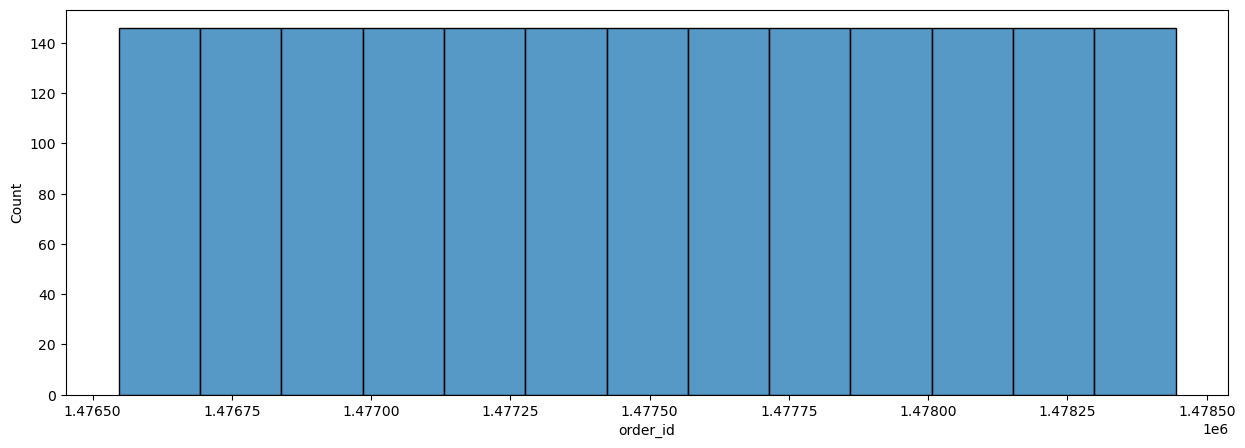

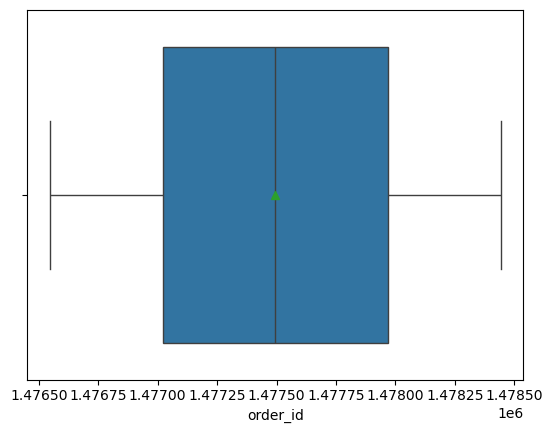

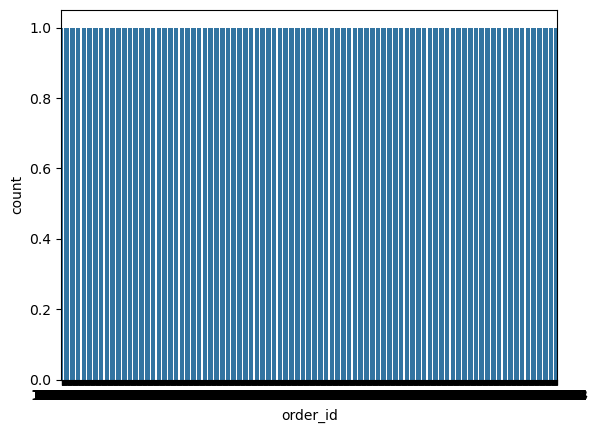

In [1961]:
#Create a histplot,boxplot and countplot for Order_id

#histplot
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'order_id')
plt.show();

#boxplot 
sns.boxplot(data = df, x = 'order_id',showmeans=True)
plt.show();

#countplot 
sns.countplot(data = df, x = 'order_id');
plt.show();

- *We can observe from the above graph that, plotting a univariate graph for `order id` is not meaningful as it's occur once for each order. They will provide more insight when analyzed with other variable like comparing with cuisine type or restaurant name etc.*

#### **Customer ID**

In [1964]:
# check and display for the unique customer ID
df['customer_id'].nunique()  
print('There are',df['customer_id'].nunique(),'unique customers')

There are 1200 unique customers


In [1965]:
# creating dataframe to display order counts for top 15 customers
df_unique_cust=pd.DataFrame(df['customer_id'].value_counts()).reset_index().head(15) 
df_unique_cust

,customer_id,count
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7
5,82041,7
6,65009,7
7,276192,7
8,97079,6
9,97991,6


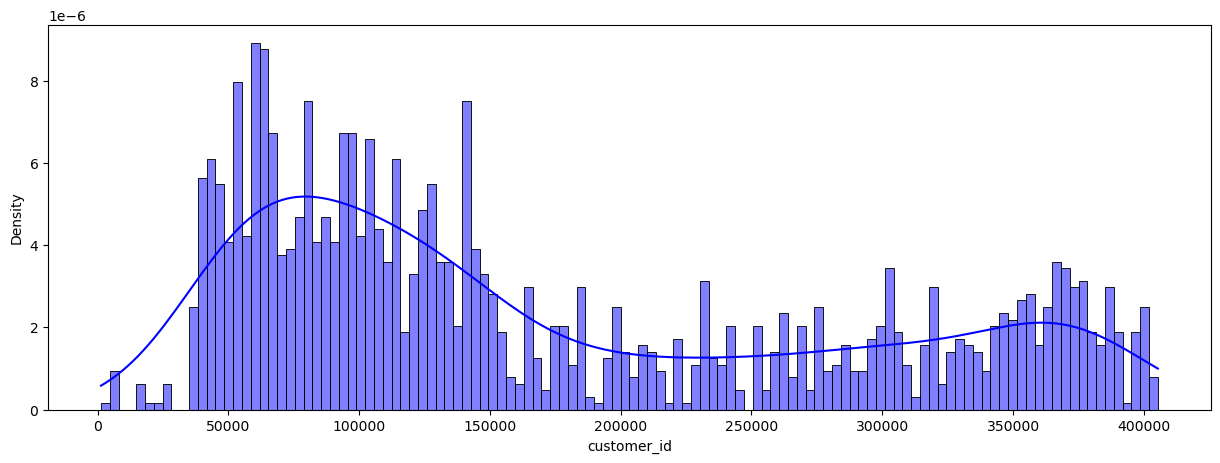

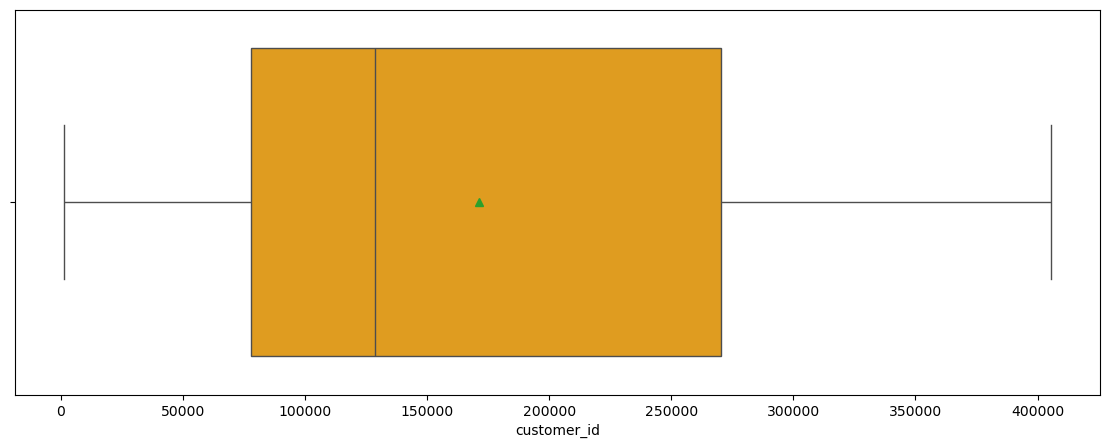

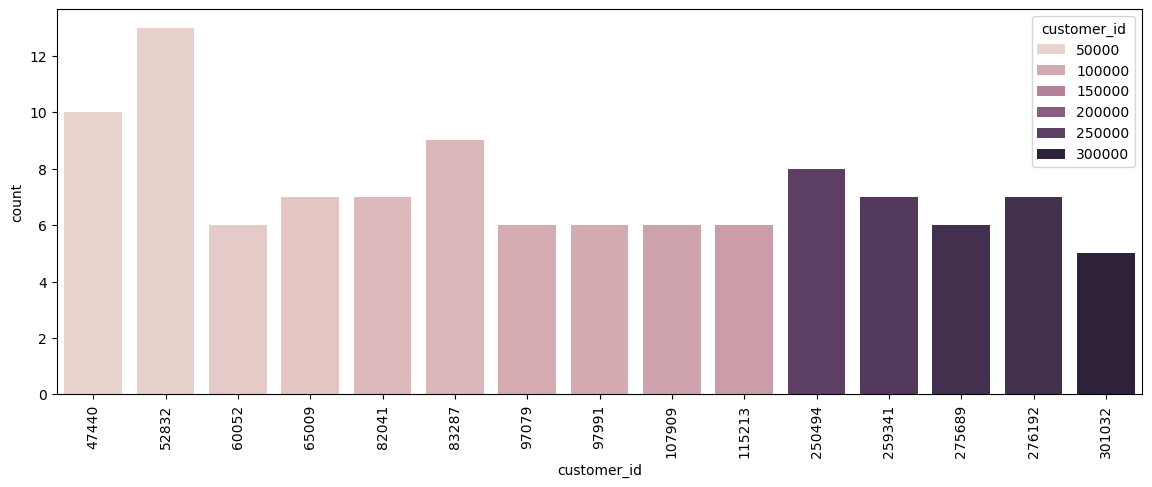

In [1966]:
# plotting the graphs (histplot,boxplot,barplot countplot/barplot etc) for customer_id

#hist plot for all the customers id

plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'customer_id',stat='density', bins=120,kde=True,color='blue')
plt.show();

#box plot for all the customers id
plt.figure(figsize=(14,5))
sns.boxplot(data = df, x = 'customer_id',color='Orange',showmeans=True)
plt.show();

#barplot for top 15 customers 
plt.figure(figsize=(14,5))
sns.barplot(data = df_unique_cust, x = 'customer_id',hue='customer_id', y='count');
plt.xticks(rotation=90)
plt.show();

*Similar to order_id analyzing customer_id alone will not provide any valuable insight*.<br>

- From the histogram we can see the customer id range from 1300 to 40000, the id in range from 53000 to 180000 has placed more orders.
- Looking at barplot of `top 15 customer`, the maximum order(13) is placed by the customer with id 52832.
- But again a meaningful analysis can be made only, when we take another variables into considerations.

#### **Restaurant Name**

In [1969]:
# check and display the unique Restaurant Name
unique_restaurant_count=df['restaurant_name'].nunique()  
print('There are',unique_restaurant_count,'different restaurants')

There are 178 different restaurants


In [1970]:
#create a dataframe to display the top 10 restaurants with orders placed in descending)
top_10_restaurant_ordercount=df['restaurant_name'].value_counts().head(10) # value_counts().head(10) will display only top 10 row for the restaurants in descending order 
top_10_restaurant_ordercount

#convert it to dataframe
df_top_10_restaurant_ordercount=pd.DataFrame(top_10_restaurant_ordercount)
df_top_10_restaurant_ordercount

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55
TAO,49
Han Dynasty,46


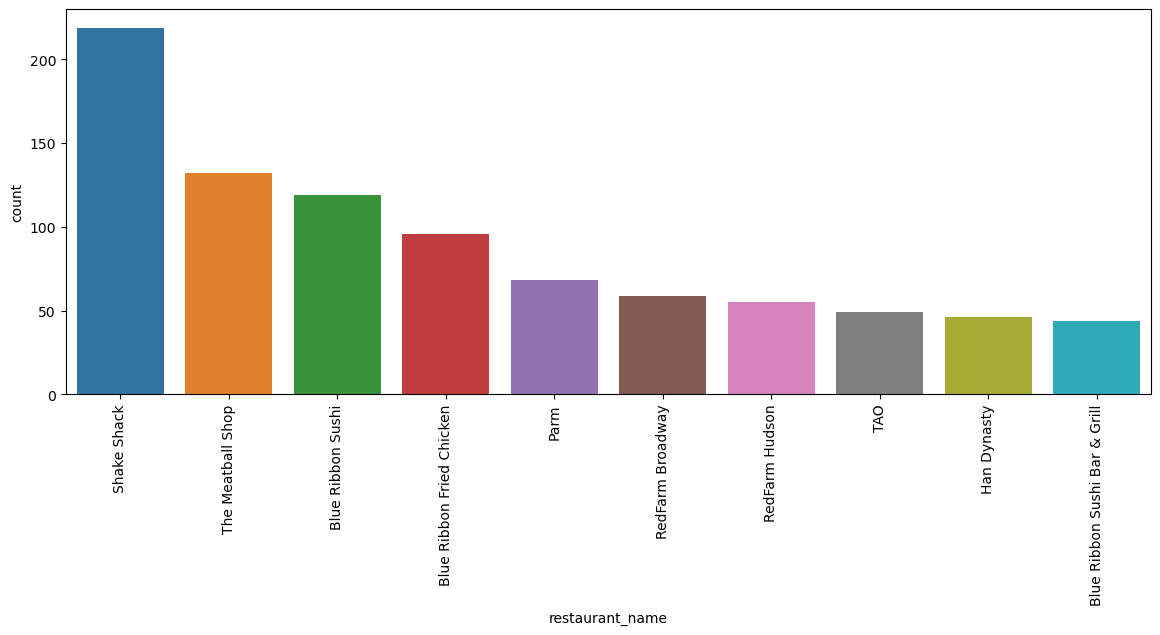

In [1971]:
#Create barplot for top 10 restaurants with orders placed in descending

plt.figure(figsize=(14,5))
sns.barplot(data = df_top_10_restaurant_ordercount, x = 'restaurant_name',y='count',hue='restaurant_name');
plt.xticks(rotation=90)
plt.show();

- *There are `178 unique restaurants`, it's very difficult to analyzed the data for all the restaurants,so plotting the graph for only top 10 restaurants with order count*.
- *We can observe from the results Shake Shack,The Meatball Shop and Blue Ribbon Sushi are the top 3 restaurant with high orders placed.*

#### **Cuisine Type**

In [1974]:
# Check and display the unique cuisine type
unique_cuisineType_count=df['cuisine_type'].nunique() 
print('There are',unique_cuisineType_count,'different type of cuisines')

There are 14 different type of cuisines


In [1975]:
unique_cuisine_type_list=df['cuisine_type'].unique() 
print('The different cuisines are:\n',unique_cuisine_type_list)

The different cuisines are:
 ['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


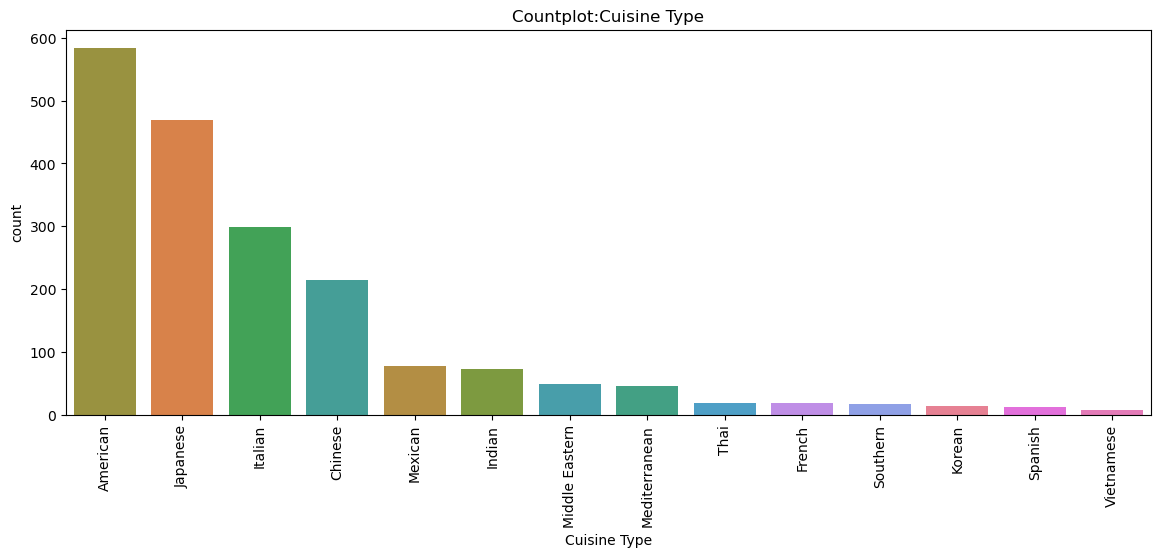

In [1976]:
# Create a countplot for cuisine type -using order parameter to sort the cuisine in descending order
plt.figure(figsize=(14,5))
plt.title('Countplot:Cuisine Type')
plt.xlabel('Cuisine Type')
sns.countplot(data = df, x = 'cuisine_type',hue='cuisine_type',order=df.cuisine_type.value_counts().index);
plt.xticks(rotation=90);

- *There are `14 different cuisines` - Korean, Japanese, Mexican, American, Indian,Italian, Mediterranean, Chinese, Middle Eastern, Thai, Southern, French,Spanish,Vietnamese*.
- *`American cuisine` is the most favorite cuisine followed by `Japanese`, `Italian` and `Chinese`, while people order less from Vietnamese, Spanish, Korean, French, Southern and Thai*

#### **Cost Of The Order**

In [1979]:
# Check and display the unique cost_of_the_order
df['cost_of_the_order'].value_counts() 
print('Unique cost of the order are:\n',df['cost_of_the_order'].value_counts() )

#Printing the percentage of unique cost_of_the_order for all orders
df['cost_of_the_order'].value_counts(normalize=True)
print('Unique cost of the order percentagewise:\n',df['cost_of_the_order'].value_counts() )

Unique cost of the order are:
 cost_of_the_order
12.180    86
12.130    82
12.230    47
24.200    42
29.100    37
          ..
5.480      1
17.070     1
6.260      1
9.610      1
29.590     1
Name: count, Length: 312, dtype: int64
Unique cost of the order percentagewise:
 cost_of_the_order
12.180    86
12.130    82
12.230    47
24.200    42
29.100    37
          ..
5.480      1
17.070     1
6.260      1
9.610      1
29.590     1
Name: count, Length: 312, dtype: int64


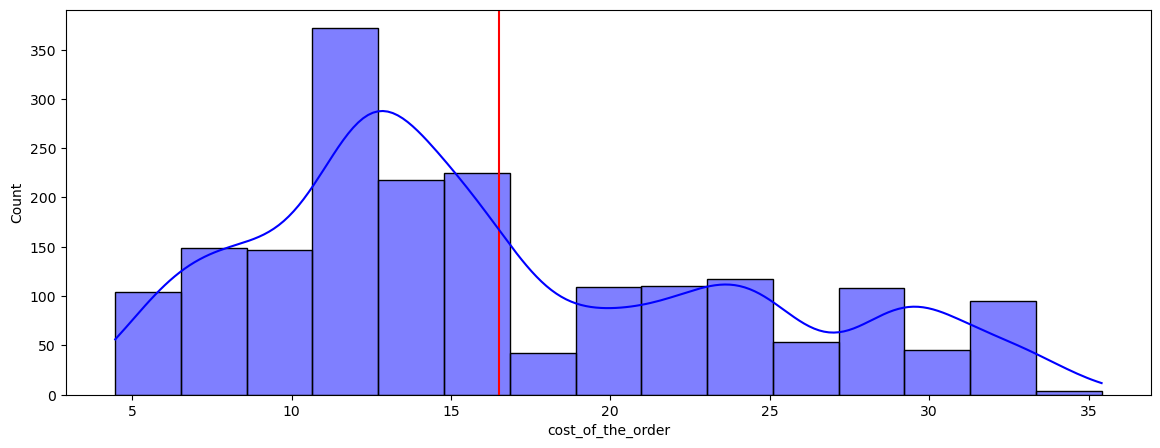

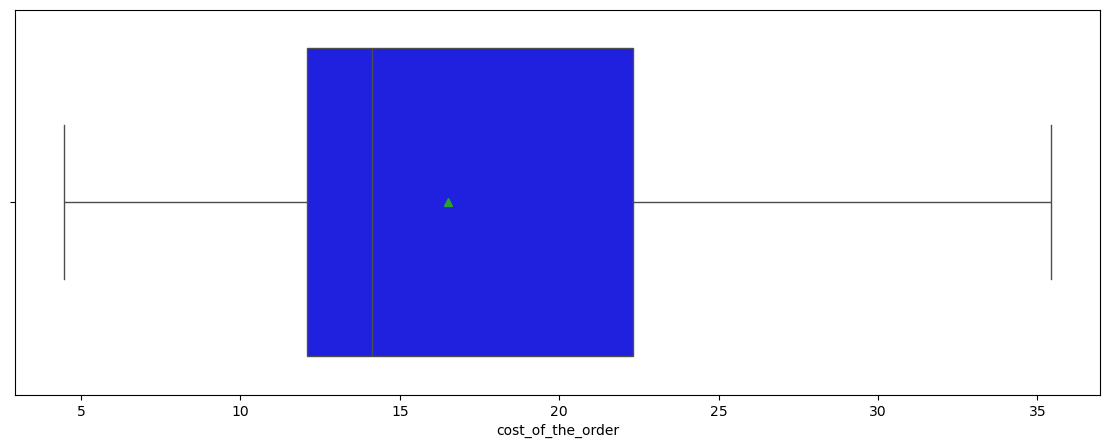

In [1980]:
#Histogram plot for cost_of_the_order
plt.figure(figsize=(14,5))
plt.axvline(df['cost_of_the_order'].mean(), color = 'r') #showing mean for histogram
sns.histplot(data=df,x='cost_of_the_order',kde=True,bins=15,color='blue') ## Histogram for the cost of order
plt.show()

#boxplot for cost_of_the_order
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='cost_of_the_order',showmeans=True,color='blue') ## Boxplot for the cost of order
plt.show()

- *The distribution for the cost of the order is `skewed slightly towards the right`, indicating orders were placed with high cost around dollars 33 to 35 range but they are very few in numbers*
- *`50 percent` of order placed, costs around dollars `11 to 23` range*.
- *The `median value` for the cost of the order is around `$14` with minimum cost amount of `$5` to max amount of $35*.<br>

- *Around `230 orders` were placed which cost somewhere between `dollars 11 to 12` price range which contributes around 11 percent of order,suggesting standard cost for most of the orders*.
    
- *There are `no outliers` present for this column*
- *The `KDE curve` shows multiple peak(multimodal distribution) suggesting grouping these orders into different group(based on different price) and further analysis will provide clearer pictures on order placed.* 


#### **Day Of The Week**

In [1983]:
# Check and display the unique values for day_of_the_week
df_day_of_the_week_unique=df['day_of_the_week'].unique() 
print("The unique values for 'Day of the week' column are",df_day_of_the_week_unique[0],'and',df_day_of_the_week_unique[1])

The unique values for 'Day of the week' column are Weekend and Weekday


In [1984]:
# displaying order percentage based on day of the week
df['day_of_the_week'].value_counts(normalize=True) 

day_of_the_week
Weekend   0.712
Weekday   0.288
Name: proportion, dtype: float64

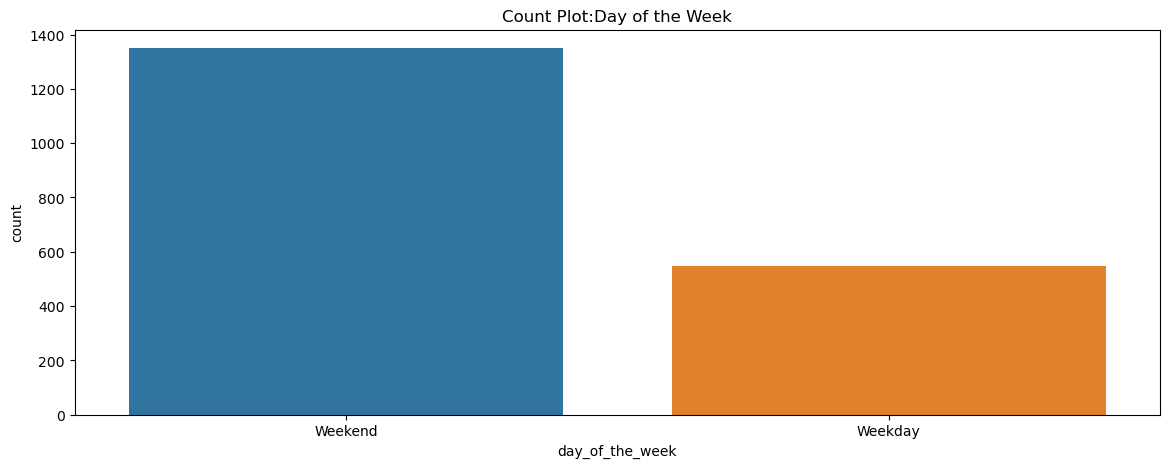

In [1985]:
# plot a count graph for 'day_of_the_week' column
plt.figure(figsize=(14,5))
plt.title('Count Plot:Day of the Week')
sns.countplot(data = df, x = 'day_of_the_week',hue='day_of_the_week'); 
plt.show()


- *There are 2 unique values for the 'Day of the week' column- `Weekend` and `Weekday`*.
- *Most of the orders are placed on Weekend(approx 1350 orders) which account for `71 percent` of orders*.


#### **Rating**

In [1988]:
# Check and display unique values for the 'rating' column
df['rating'].unique() 
print('Different ratings given by the customers are:\n',df['rating'].unique())

Different ratings given by the customers are:
 ['Not given' '5' '3' '4']


In [1989]:
# Check and display counts for the 'rating' column
df['rating'].value_counts() 
print('Different ratings given by the customers are:\n',df['rating'].value_counts() )

Different ratings given by the customers are:
 rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


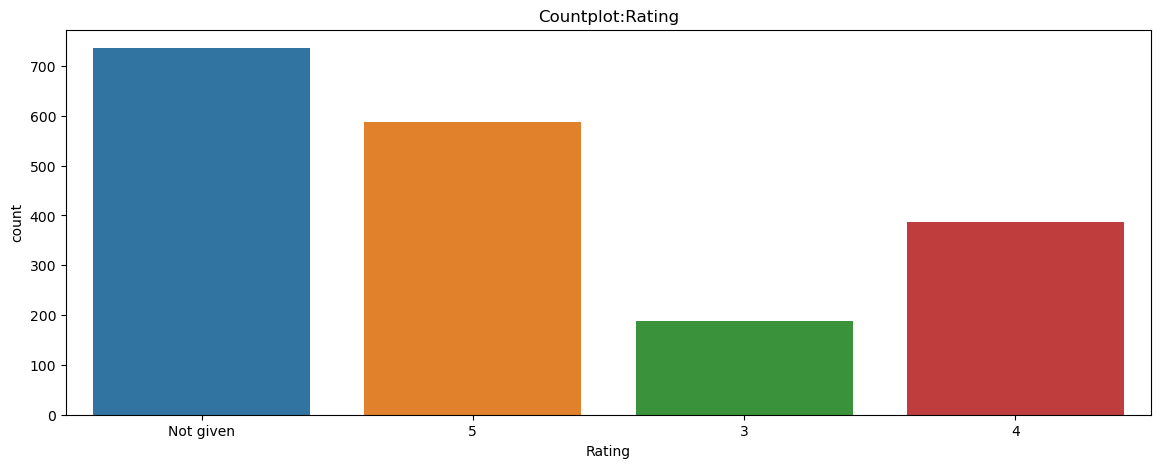

In [1990]:
## plot a count plot for 'rating' column
plt.figure(figsize=(14,5))
plt.title('Countplot:Rating')
plt.xlabel('Rating')
sns.countplot(data = df, x = 'rating',hue='rating'); 

-*There are 4 different unique rating- `Not given, 5, 3 and 4`*.

-*`Around 39 percent of orders`(736) were not rated by the customers as 'Not Given'(as shown in the graph) followed by `rating of 5` for approx 580 orders*.


#### **Food Preparation Time**

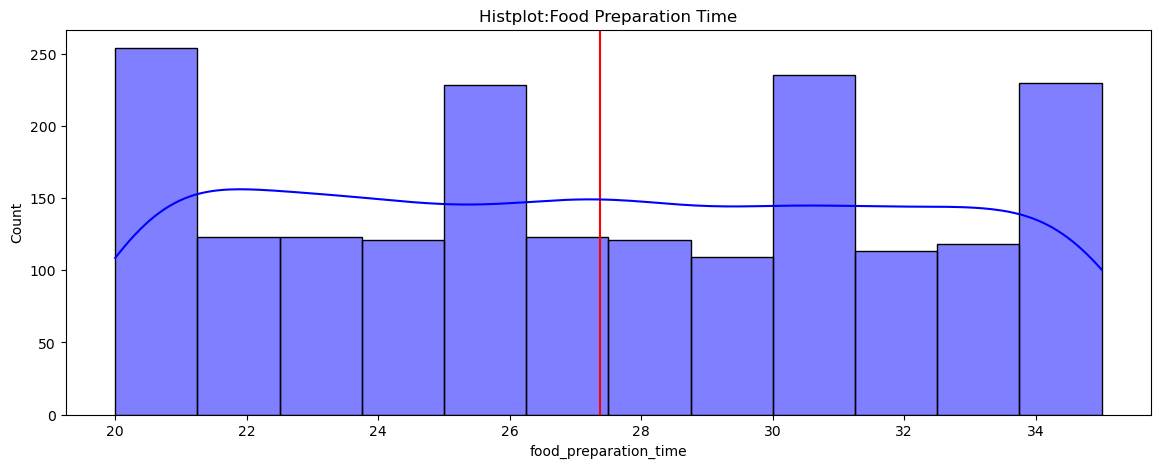

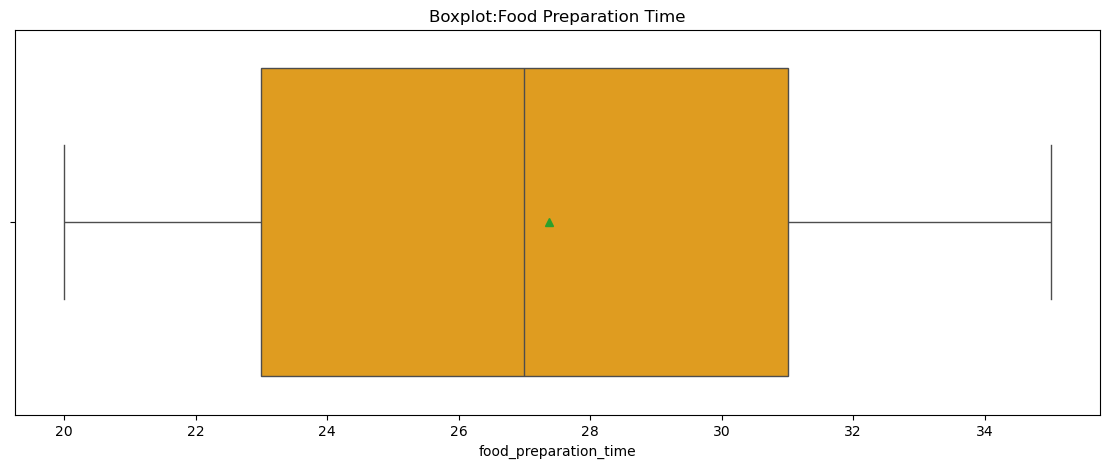

In [1993]:
# plot the histogram for the Food Preparation Time
plt.figure(figsize=(14,5))
plt.axvline(df['food_preparation_time'].mean(), color = 'r') #showing mean on the histogram
plt.title('Histplot:Food Preparation Time')
sns.histplot(data=df,x='food_preparation_time',kde=True,color='blue') 
plt.show()

# plot the boxplot for the Food Preparation Time
plt.figure(figsize=(14,5))
plt.title('Boxplot:Food Preparation Time')
sns.boxplot(data=df,x='food_preparation_time',color='orange',showmeans=True) 
plt.show()

- *The `average time` to prepare the food is `approx 27 min`. While it take *minimum time of 20 min* to prepare a food, the maximum time can go as high as 35 min*.<br>
- *`75 percent` of orders takes less than 31` minutes to prepare the food*.<br>
- *There are no outliers for this column*.<br>

#### **Delivery Time**

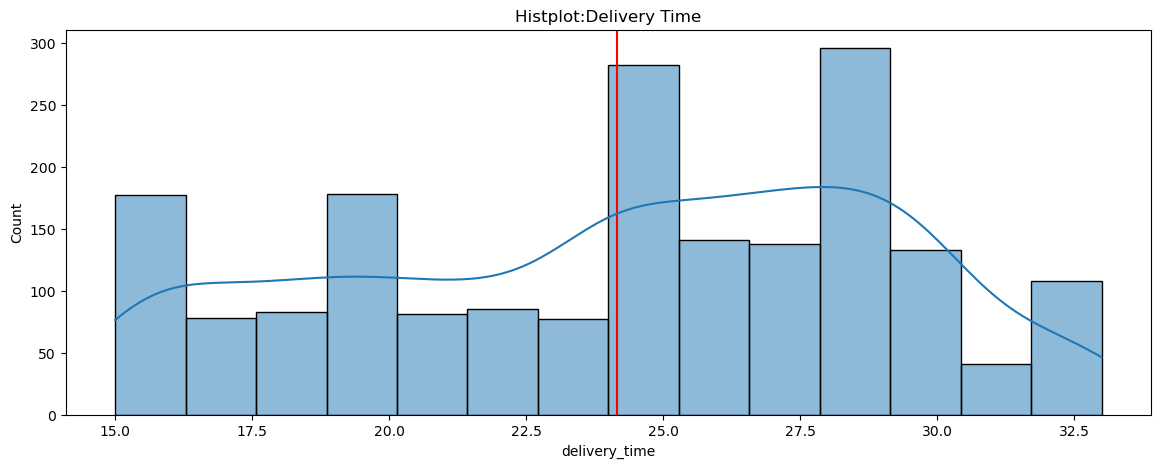

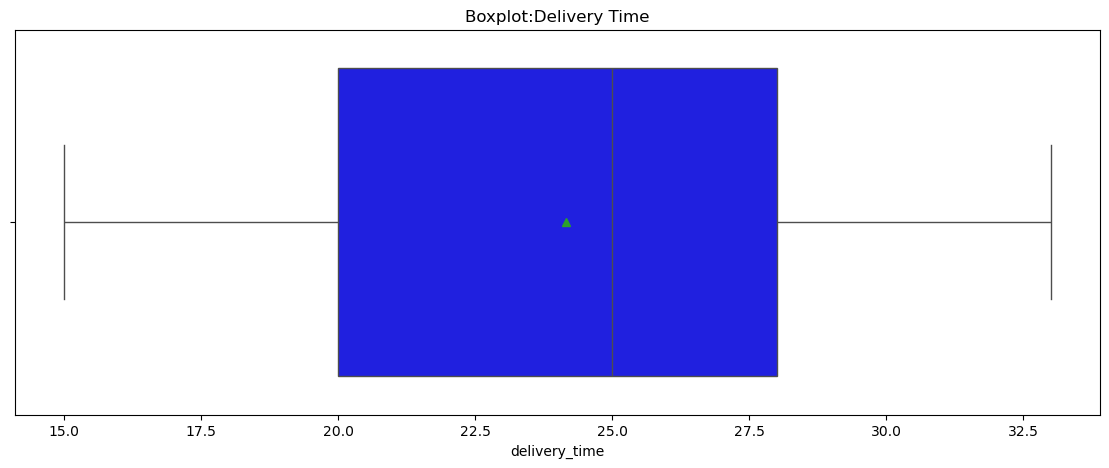

In [1996]:
# plot the histogram for the delivery time

plt.figure(figsize=(14,5))
plt.axvline(df['delivery_time'].mean(), color = 'r')  #showing mean on the histogram
plt.title('Histplot:Delivery Time')
sns.histplot(data=df,x='delivery_time',kde=True) #kde=True will create smoothed curve over the histogram representing the probability density function (PDF) of the variable being plotted 
plt.show();

# plot the boxplot for the delivery time
plt.figure(figsize=(14,5))
plt.title('Boxplot:Delivery Time')
sns.boxplot(data=df,x='delivery_time',showmeans=True,color='blue') 
plt.show()

- *The delivery time for `50 percent of the orders` are between `20 to 28 min` time range,suggesting typical time for delivering food.*<br>

- *On the `average `it take approx `24 min` to delivery food to customers considering various factors like distance,traffic,food pickup confirmation etc*<br>
- *There are few orders which can be deliver in `15 minutes`,suggesting `nearby dropoff` locations*<br>
- *There are no outliers for this column.*<br>
- *The delivery time of around `33 minutes` suggests dropoff at distance point or multiple pickups from different restaurants(if the app supports multiple pickups from different restaurants)*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [1999]:
# Solution#1
#Get and display top 5 restaurants with highest number of orders 
df_top_5_restaurant_ordercount=df['restaurant_name'].value_counts().head() #using value_counts and head() will display only top 5 restaturants name.


**Solution2:** `using .size() function` which give the count of unique values and then performing sorts on the result `ascending=False` will sort the data in `descending order`

In [2001]:
#solution#2
#Get and display top 5 restaurants with highest number of orders 
df.groupby(['restaurant_name']).size().sort_values(ascending=False).head() 

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64

In [2002]:
#convert it to dataframe for plotting graph
df_top_5_restaurant_ordercount=pd.DataFrame(df_top_5_restaurant_ordercount)
df_top_5_restaurant_ordercount

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


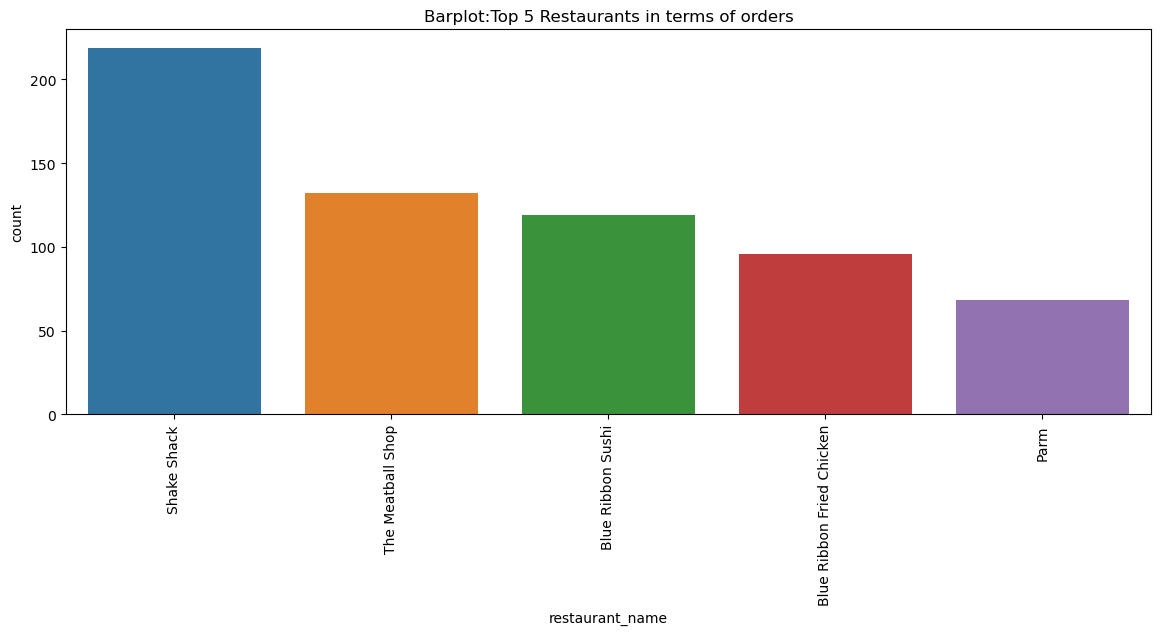

In [2003]:
#Create barplot for top 5 restaurants with highest order count
plt.figure(figsize=(14,5))
plt.title('Barplot:Top 5 Restaurants in terms of orders')
sns.barplot(data = df_top_5_restaurant_ordercount, x = 'restaurant_name',y='count',hue='restaurant_name');
plt.xticks(rotation=90)
plt.show();

#### Observations:

- *The top 5 restaurants are- `Shake Shack` with order count of `219`,followed by `The Meatball Shop(132)`, `Blue Ribbon Sushi(119)`, `Blue Ribbon Fried Chicken(96)` and `Parm(68)`*
  
- *`Note: df.head()` will list the first 5 rows*.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [2006]:

#applying filter on day_of_the_week column to retrieve orders for weekends only 
df_weekend = df[df['day_of_the_week'] == 'Weekend']

#Using .max() function on value_counts() to get cuisine count 
most_popular_cuisine_count=df_weekend['cuisine_type'].value_counts().max()

#Using idxmax() function on value_counts() to get cuisine value 
most_popular_cuisine_count_value=df_weekend['cuisine_type'].value_counts().idxmax()

#Displaying the results
print('The most popular cuisine is',most_popular_cuisine_count_value,'with order count of',most_popular_cuisine_count,'on weekends')


The most popular cuisine is American with order count of 415 on weekends


#### Observations:

- *The most popular cuisine on weekend is `American` with `order count of 415`*

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [2009]:
# apply filter on cost_of_the_order column where cost are above 20 dollars
cost_gr_than_20 = df['cost_of_the_order']>20   # filter condition
df_cost_gr_than_20=df[cost_gr_than_20]         # dataframe with filter condition


In [2010]:
# Display the total orders count where the cost is above 20 dollars

# using shape[0] on above dataframe 
print('The total orders count that cost above 20 dollars is:', df_cost_gr_than_20.shape[0]) 

#alternate way of doing- using count() fn on any column can give the value for row count
print('The total orders count that cost above 20 dollars is:', df_cost_gr_than_20['order_id'].count()) 

The total orders count that cost above 20 dollars is: 555
The total orders count that cost above 20 dollars is: 555


In [2011]:
# Calculate and display the percentage of orders
#percent= (filtered order count/total number of order count) * 100
#where filtered order count=555 from above result and total number of order count(in whole dataset)=1898 

perc_gr_than_20 = (df_cost_gr_than_20.shape[0] / df.shape[0]) * 100
print(round(perc_gr_than_20, 2), '%', 'of orders are above 20 dollars') # rounding the result to 2 decimal points

29.24 % of orders are above 20 dollars


#### Observations:

- *There are 555 orders that cost above 20 dollars and `Percentage of orders` is `29.24 %`*

### **Question 10**: What is the mean order delivery time? [1 mark]

In [2014]:

# Display the mean delivery time
mean_del_time = df['delivery_time'].mean()  # applying mean fn on 'delivery_time' column will give the mean value.

print('The mean delivery time for an order is', round(mean_del_time, 2), 'minutes')

The mean delivery time for an order is 24.16 minutes


#### Observations:
- *The `mean delivery time` for an order is `24.16 minutes`*

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [2017]:

# Get the counts of  each customer_id

top_3_freq_cust_id=df['customer_id'].value_counts().head(3)
print(top_3_freq_cust_id)

#displaying customer name and count using .items() to iterate through a panda series
#Series.items()- This method returns an iterable tuple (index, value) i.e iterate over (index(i.e rowlabel), value) tuples, 
#so here for each customer_id and corresponding count it will iterate for 3 customer (.value_counts().head() will store information for 3 customer)

for customer_id, order_count in top_3_freq_cust_id.items():
    print(f"Customer with Id {customer_id}, has count of {order_count} orders")
    

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64
Customer with Id 52832, has count of 13 orders
Customer with Id 47440, has count of 10 orders
Customer with Id 83287, has count of 9 orders


#### Observations:
 *Customer Id's for top 3 frequent customers along with the order count is listed below*
 
`Customer Id: 52832`  = 13 orders <br>
`Customer Id: 47440` = 10 orders <br>
`Customer Id: 83287` =  9 orders <br>

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### **pairplot** shows the relationship between two numeric variables for each pair of columns in the dataset.

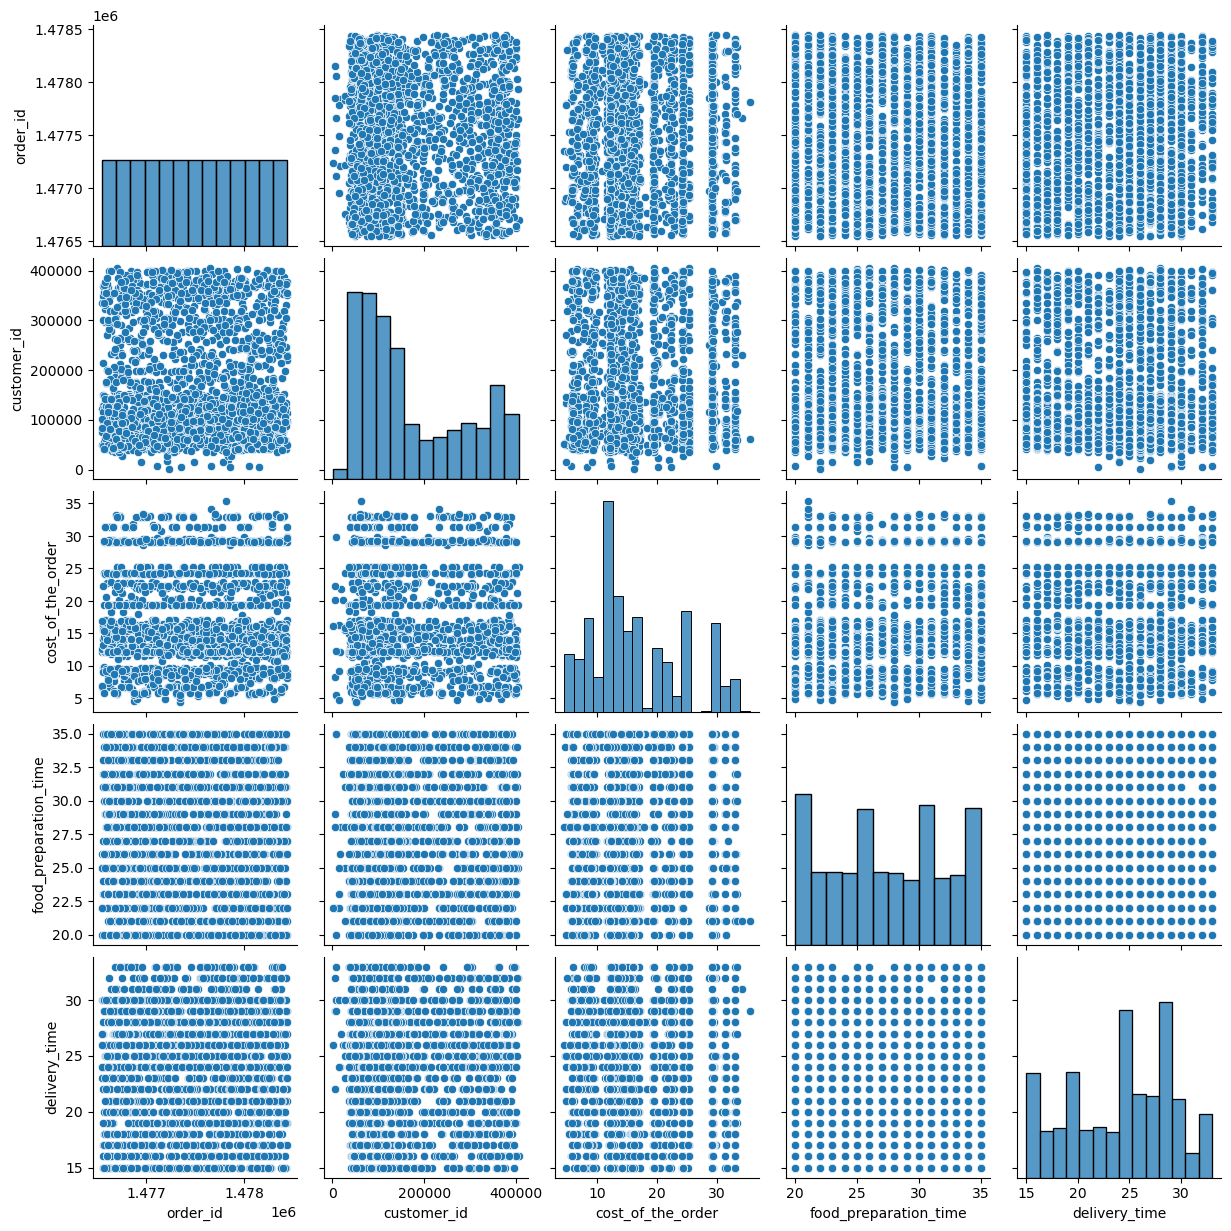

In [2022]:
# Lets plot pairplot to understand the relationships between the all the numeric variables
sns.pairplot(data = df);

- *it's difficult to analyze the graph here, lets do Bivariate Analysis on numericals and categorical variables to understand the relationship better.*

#### Cuisine vs Cost of the order

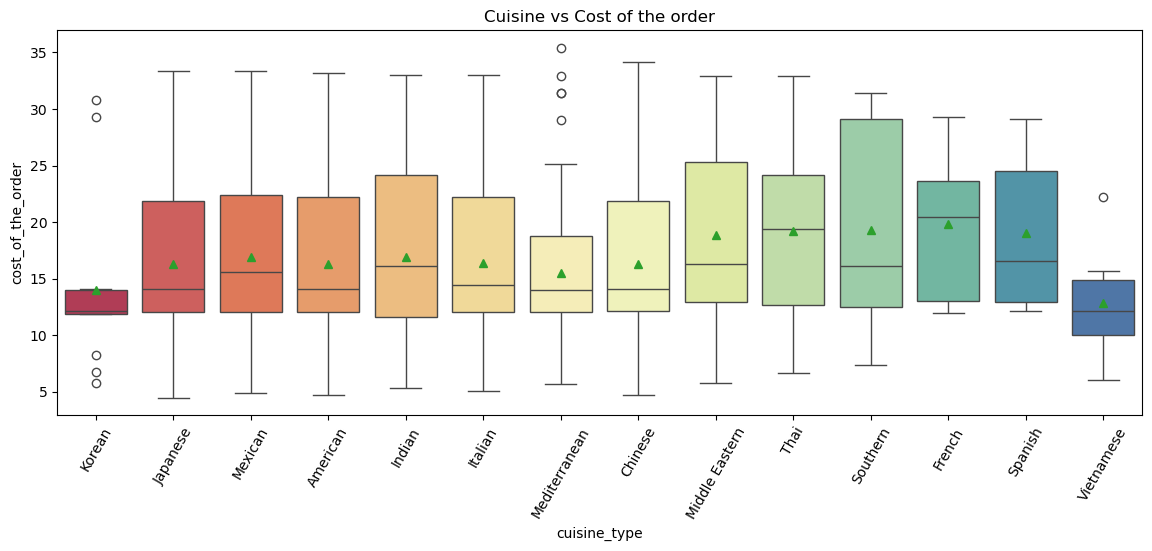

In [2025]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(14,5))
plt.title('Cuisine vs Cost of the order')
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'Spectral', hue = "cuisine_type",showmeans=True)
plt.xticks(rotation = 60)
plt.show()

- *On an average the cost of an order for `most of the cuisines` ranges somewhere between `dollars 11-23`, except for `Korean and Vietnamese` which are little cheaper and more affordable*.
- *The cost of the orders for most of the cuisines except French are `right-skewed` suggesting average cost of the order is higher than median value.*
- *The average, median value and whisker for `Japanese, American and Italian` cuisines looks similar. Right skewness and moderate IQR indicate similar cost range.*
- *`Thai cuisine` showed balanced and symmetric distribution overall. Mean and median are closer but high, indicating higher order cost but they are consistent* 
- *Cost of the order for `Southern cuisines` are little higher and more spread out than other cuisines, indicating it's little pricey.*
- *The median value for `French cuisine` is higher than average cost of the order and shorter lower end tail,indicating it's expensive*.
- *The higher median and mean value, short whisker at lower end and wider IQR for `Spanish cuisine`,indicates distribution of cost mostly near the centre.The right skewness indicate pricey items on the menu card, hence making this cuisine little expensive.*
- *The typical cost for ordering `Korean food` is somewhere between dollars 11-14 range, but presence of some `outliers` on the both the ends, suggests there are few orders which have cost more than usual or less, which could be because of order size or menu items*.
- *`Mediterranean and Vietnamese` cuisine also shows some outliers but they are only associated with high cost orders.*

**In short**, 
- *The cost orders for most of the cuisines except French are `right-skewed` suggesting average cost of the order is higher than median value*
- *`Japanese, American and Italian` cuisines plots looks similar with moderate IQR and have similar cost range.*
- *Cuisine like `Southern, French and Spanish` are more pricey because of higher median and mean value ,right skewness, short lower end tail and wider IQR*.
- *`Korean and Vietnamese` which are little cheaper and more affordable*.
- *`Thai cuisine` showed balanced and symmetric distribution overall*.
- *`Korean, Mediterranean and Vietnamese` cuisine shows some outliers suggesting high cost on some of the orders.*

#### Cuisine vs Day of week

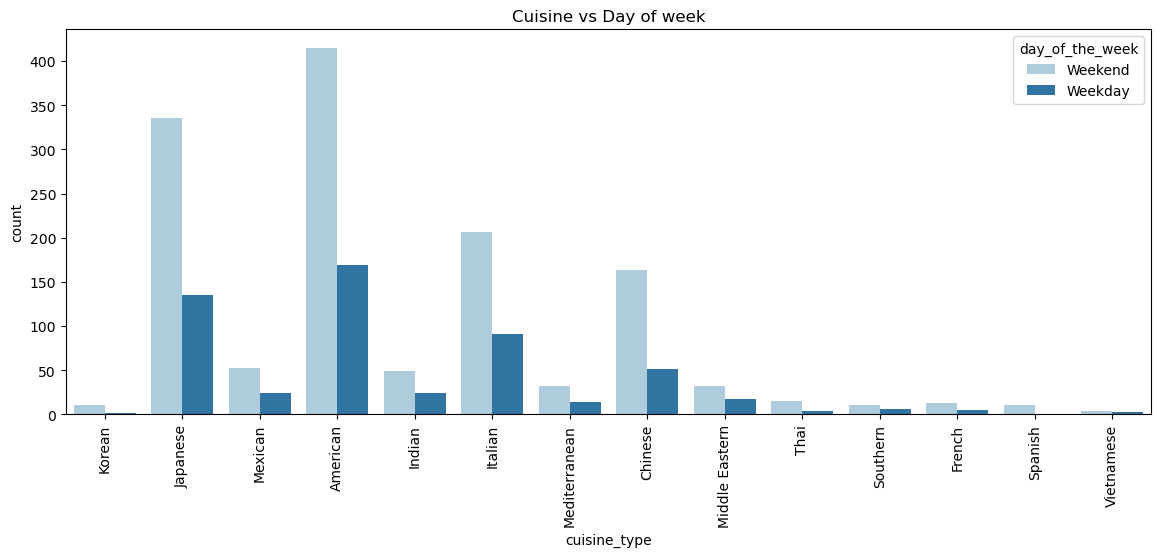

In [2029]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(14,5))
plt.title('Cuisine vs Day of week')
sns.countplot(x = "cuisine_type", data = df, palette = 'Paired', hue = "day_of_the_week")
plt.xticks(rotation = 90)
plt.show()

- *We observe that less order (almost half) is placed on weekdays than on weekend for all the cuisines. suggesting people order less on working days*

#### Cuisine vs Food Preparation time

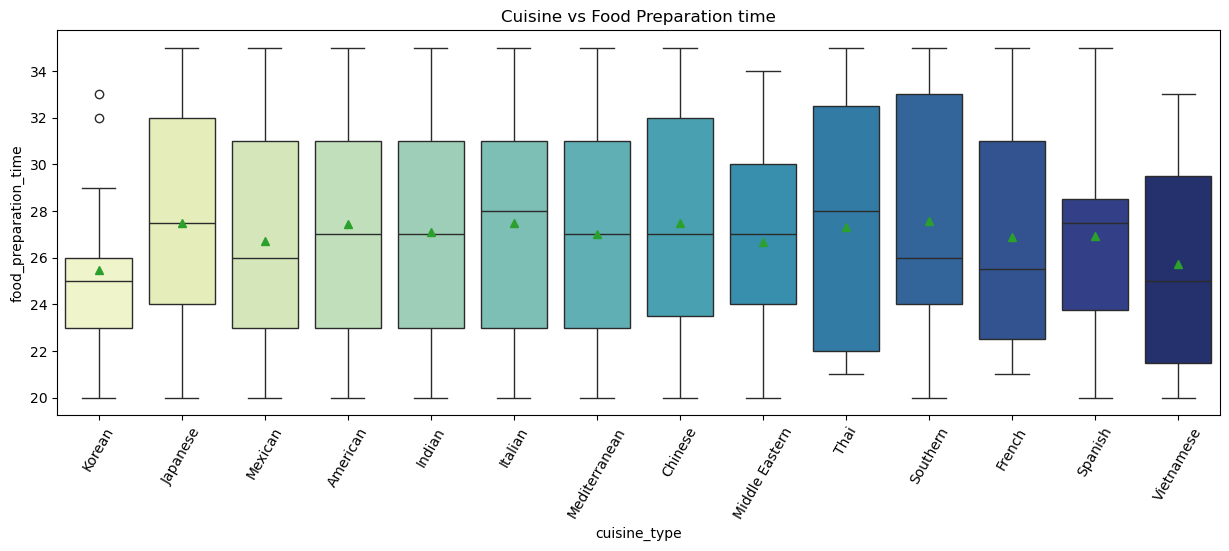

In [2032]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,5))
plt.title('Cuisine vs Food Preparation time')
sns.boxplot(data=df,y='food_preparation_time',x='cuisine_type',hue='cuisine_type',legend=False,palette = 'YlGnBu',showmeans=True)  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

- *`some outliers for Korean cuisine` means that some orders take more time to prepare. Which seems fine as the large order takes or complex menu takes more time.Also food preparation time for most of the Korean orders are least*.
  
- *Typical food preparation time for `Mexican, American, Indian, Italian and Mediterranean` in the IQR is somewhat similar(ranges 23-31 min)*.
- *`Minimum time` to prepare food for any cuisines are `20 min` except for `Thai and French` which is around 21 min.*
- *Food preparation time for `Japanese cuisine, American, Indian, Mediterranean, Middle Eastern` are balanced and symetric, with mean and median closer to each other.Except for high prep time on few orders for Japanese cuisine*.
- *Median value for preparing `Spanish food` is higher than the average time and skewed left ,indicating food preparation time is more for most of the orders.*  
- *Very few order for `Vietnamese cuisine` takes more than 28 min to prepare the food*.  
- *75% percent of the order takes aprox 33 mins to prepare food for `Southern cuisine'.*
- *`Thai, Italian and Spanish` cuisine has high median value than other cuisine indicating more time are required for most of the orders*.

#### Day of the Week vs Delivery time

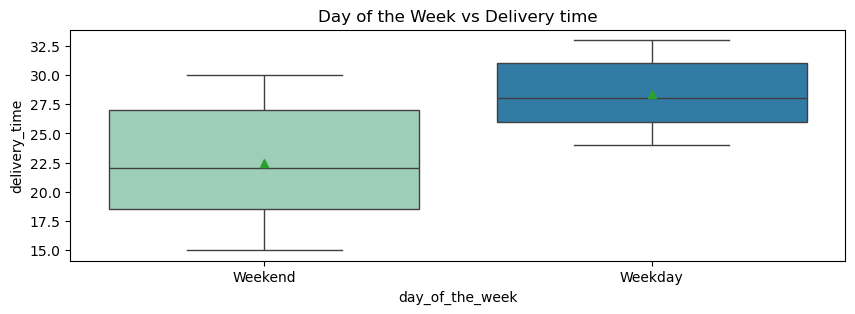

In [2035]:
# Relationship between day of the week and delivery time using boxplot
plt.figure(figsize=(10,3))
plt.title('Day of the Week vs Delivery time')
sns.boxplot(data=df,y='delivery_time',x='day_of_the_week',hue='day_of_the_week',legend=False,showmeans=True,palette = 'YlGnBu')  
plt.show()

- *`Delivery time` is more on `weekday` as compared to weekend,typical time to deliver food on weekends is around 23 min while it takes approx 5 mins extra to deliver the food on weekdays,suggesting rush hour due to office/school/work on weekdays*
- *There are `no outliers` indicating no values falls outside the outlier range(1.5 * IQR limit)*

#### Rating vs Cost of the order

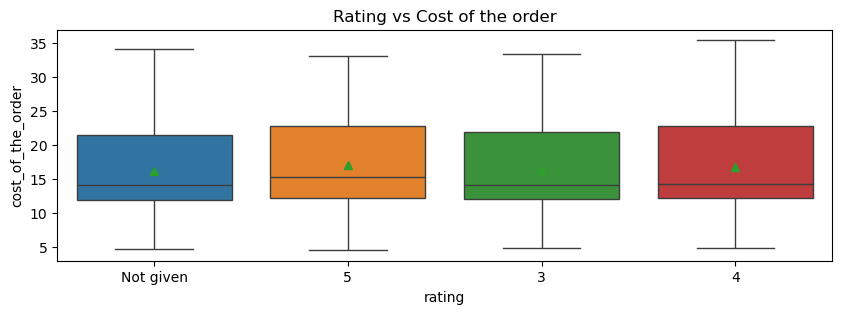

In [2038]:
# Relationship between rating and cost of the order
plt.figure(figsize=(10, 3))
plt.title('Rating vs Cost of the order')
sns.boxplot(data=df,x = 'rating', y = 'cost_of_the_order',hue='rating',showmeans=True)  
plt.show()

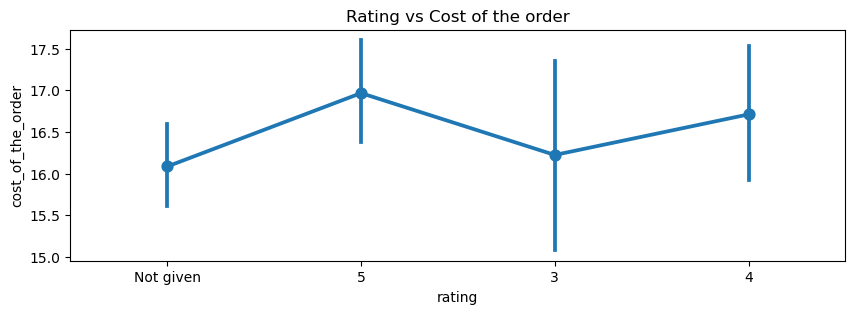

In [2039]:
# Relationship between rating and cost of the order
plt.figure(figsize=(10, 3))
plt.title('Rating vs Cost of the order')
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)   
plt.show()

- *`Higher the cost of the order`, higher is the rating and vice-versa but they are not very significantly strong and shows poor positive correlation*
- *The rating goes up to '5' as the order cost increases(17$) and again goes down to 3 as the cost decreases.*

#### Rating vs Food preparation time

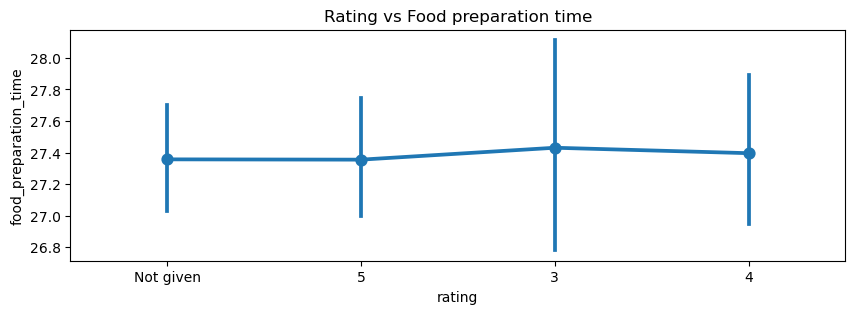

In [2042]:
# Relationship between rating and food preparation time
plt.figure(figsize=(10,3))
plt.title('Rating vs Food preparation time')
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

- *We can observe that the `rating is little high` when average `food preparation time is less`, indicating customer provide good rating if the food is prepared in less time,but variation is very minor*
- *Rating is given as 3 when the food preparation time goes up.*
- *We do not find any strong correlations between these variable, suggesting they are not dependent much*



#### Rating vs Delivery time

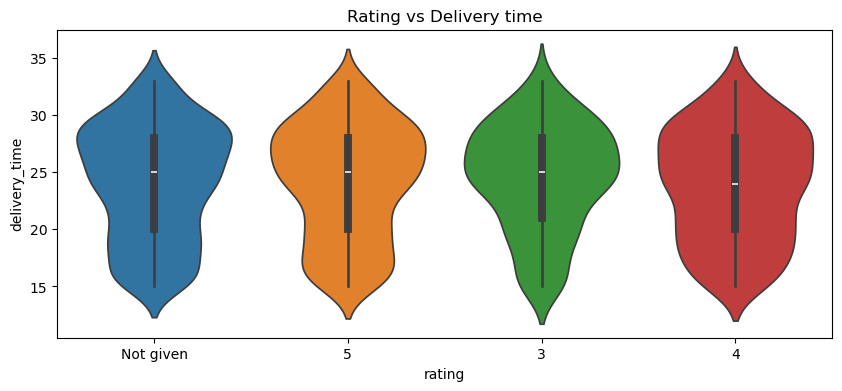

In [2045]:
# Relationship between rating and delivery time- violin plot
plt.figure(figsize=(10, 4))
plt.title('Rating vs Delivery time')
sns.violinplot(data = df,x = 'rating', y = 'delivery_time',hue='rating')
plt.show()

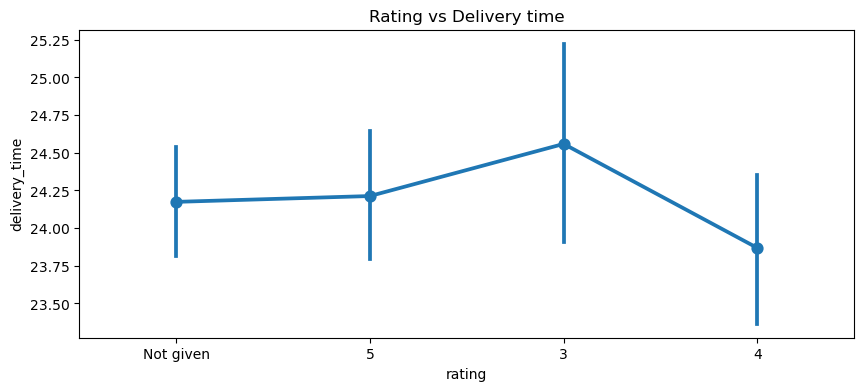

In [2046]:
# Relationship between rating and delivery time-point plot
plt.figure(figsize=(10, 4))
plt.title('Rating vs Delivery time')
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

- *The rating is high when delivery time is less , which is as expected, customer often rate higher for quick and on time delivery.*
- *As can be seen from above plot the `rating is 3` when the `average time to deliver food is high`, resulting in poor customer satisfaction.*
- *but we can also observe the `rating is 4` for some orders for which delivery time is less when compared with `rating of 5`. This can be due to missing information on rating column for 39% of data. Also we have to consider other factors too like food preparation, quality,taste etc.*

#### Heat map - to show Correlation among numericals variables

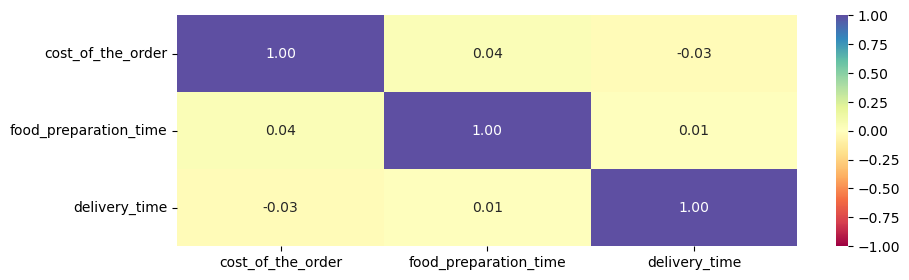

In [2049]:
# Plot the heatmap for numerical variables
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 3))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *The heatmap shows `slightly positive correlation(.04)` between food_preparation_time and cost_of_the_order, confirming our earlier observation these variables are weakly correlated.*
- *`slightly negative correlation(-0.03)` between delivery_time and cost_of_the_order, indicating increase in cost_of_the_order does will not impact much on delivery time as they are weakly correlated.*
- *Again  delivery_time and food_preparation_time are poorly positive correlated, which is obvious as these times are different tasks independent of each other*.

**lets see if adding 'rating' column to Heat map suggest any strong correlation relationship**

- *For this we need filter out the non numerical rating 'Not given' , copy it to new dataframe and then convert the rating column to an integer.*
  

In [2052]:
#Filtering out the non-numerical values 'Not given' i.e include only numerical ratings.
rating_given=df['rating']!='Not given'

#copy the data into new dataframe 
df_rating_given=df[rating_given].copy()
df_rating_given.info() 



<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 90.8+ KB


- *we can see from info() result, The datatype for rating is still object as we have not converted it yet.*
- *to perform numerical operation we need to convert it to int type*

In [2054]:
# Now Convert rating column from object to integer type using astype 
df_rating_given['rating'] = df_rating_given['rating'].astype('int')
df_rating_given.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int32  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 86.2+ KB


In [2055]:
#displaying first 5 rows
df_rating_given.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30


- *rating column converted to integer type. Which we can use it for our heat map now*

#### Lets check the Heat Map for Correlation -after converting rating to integer

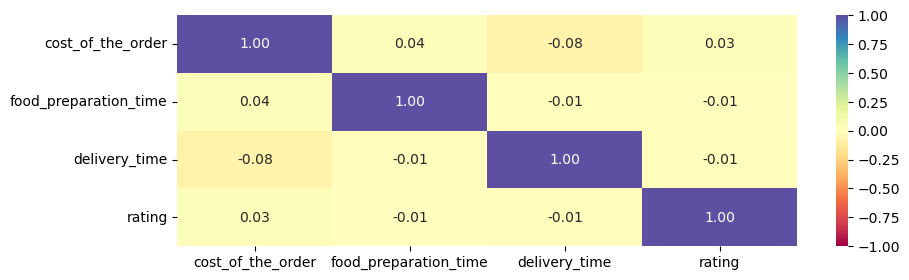

In [2058]:
# Plot the heatmap for numerical variables
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']
plt.figure(figsize=(10, 3))
sns.heatmap(df_rating_given[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *So after removing rating data for around 39% of orders (for which rating was not provided) , we can see the rating is poorly negatively correlated with food_preparation_time and delivery_time.Which should be fine lesser the delivery time higher the rating should go.*
- 
 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

**Please refer the previous section (Heat map - to show Correlation among numericals variables) for detailed explanation**


In [2062]:
#Filtering out the non-numerical values 'Not given' i.e include only numerical ratings.
rating_given=df['rating']!='Not given'

#copy the data into new dataframe 
df_rating_given=df[rating_given].copy()
df_rating_given.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30


In [2063]:
# Now Convert rating column from object to integer type using astype 
df_rating_given['rating'] = df_rating_given['rating'].astype('int')
df_rating_given.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30


In [2064]:
# Create a dataframe that contains the restaurant names with their rating counts sorted in descending order and reset the index
df_rating_count = df_rating_given.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [2065]:
# Get the restaurant names that have rating count more than 50
rating_gr_than_50=df_rating_count['rating']>50
rest_names = df_rating_count[rating_gr_than_50]['restaurant_name']
rest_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

- *Only 4 restaurants have rating count more than 50 (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken)*
- *Now we have to find mean of these restaurant for which we have to copy the data for these restaurants into new dataframe*

In [2067]:
#check and copy the data for these 4 restaurants into new dataframe
# the isin() fn will check all the restaurant names in df_rating_given dataframe, if found it will copy those rows into new dataframe 
qualified_rest_data=df_rating_given['restaurant_name'].isin(rest_names) 
df_qualified_rest_data=df_rating_given[qualified_rest_data].copy()
df_qualified_rest_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.300,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.200,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.200,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.100,Weekday,5,21,30


- *Now we have data for all these 4 restaurants, we need to find the mean of these and then check if average mean is greater than 4*

In [2069]:
#find the mean rating of the restaurants by using the group by function
df_qualified_rest_with_mean_4=df_qualified_rest_data.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()
df_qualified_rest_with_mean_4
#checking for restaurants eligible for promotional offer i.e last step if avg mean is greater than 4
df_rest_eligible_forOffer=df_qualified_rest_with_mean_4[df_qualified_rest_with_mean_4['rating']>4]
df_rest_eligible_forOffer

,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


#### Observations:
*The Restaurants which are eligible for the promotional offer fulfilling the above criteria are listed below (average rating in descending order )-*
  
     1. The Meatball Shop (4.512)
     2. Blue Ribbon Fried Chicken(4.328)
     3. Shake Shack (4.278)
     4. Blue Ribbon Sushi (4.219)

Note: Another approach to this problem can be achieved by using Merge to get matching rows based on the restaurant name from earlier created dataframe.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [2072]:
#create a function to calculate the revenue 
#call the function and pass the cost value to calculate revenue based on the above condition 
#cond: cost>20 revenue=cost*.25 (i.e 25%) ; cost>5 revenue=cost*.15(15%) else revenue is 0

def calculate_revenue(cost):
    if cost > 20:
        return cost*0.25     #
    elif cost > 5:
        return cost*0.15
    else:
        return cost*0

#adding new column 'Revenue' to store the calculated value. call the function and return the result in revenue column
df['Revenue'] = df['cost_of_the_order'].apply(calculate_revenue) 
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20,7.688
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23,1.812
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28,1.835
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15,7.300
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24,1.738


In [2073]:
# Display the total revenue 
total_revenue = df['Revenue'].sum() #taking the sum of revenue column 
print('The net revenue generated is around', round(total_revenue, 2), 'dollars')  #rounding it to decimal point 2

The net revenue generated is around 6166.3 dollars


#### Observations:
- *The `net revenue` generated by the company across all orders is around `6166.3 dollars`*

### **Additional scenarios on Revenue generation**
Let's check how revenue is generated cuisinewise

In [2076]:
#get the total revenue cuisinewise and print it
total_revenue_by_cuisine = df.groupby('cuisine_type')['Revenue'].sum()
print(total_revenue_by_cuisine)
total_revenue_by_cuisine.sum()

cuisine_type
American         1878.274
Chinese           690.040
French             76.192
Indian            246.994
Italian           966.885
Japanese         1478.245
Korean             33.303
Mediterranean     136.328
Mexican           256.693
Middle Eastern    193.553
Southern           68.754
Spanish            47.236
Thai               78.052
Vietnamese         15.753
Name: Revenue, dtype: float64


6166.303

In [2077]:
#converting it into dataframe
df_total_revenue_by_cuisine=pd.DataFrame(total_revenue_by_cuisine)
df_total_revenue_by_cuisine.sort_values('Revenue',ascending=False)

,Revenue
cuisine_type,
American,1878.274
Japanese,1478.245
Italian,966.885
Chinese,690.040
Mexican,256.693
Indian,246.994
Middle Eastern,193.553
Mediterranean,136.328
Thai,78.052


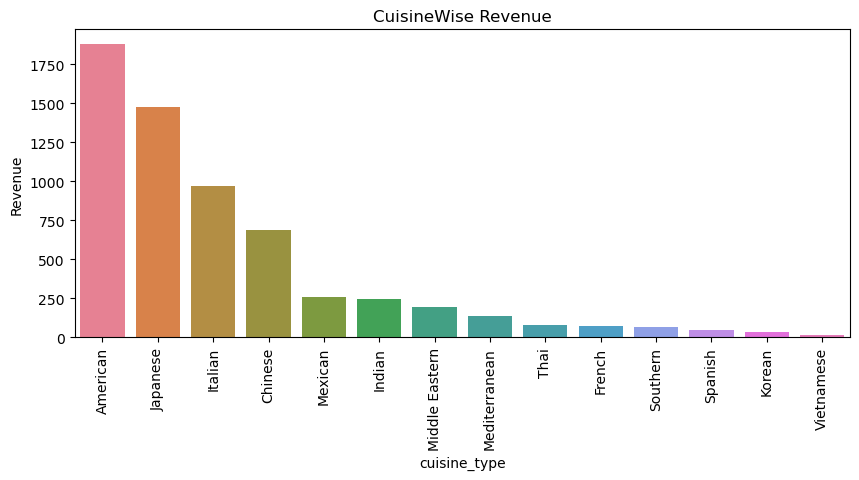

In [2078]:
#create a barplot to analyze the revenue cuisinewise

plt.figure(figsize=(10, 4))
plt.title('CuisineWise Revenue')
sns.barplot(data=df_total_revenue_by_cuisine.sort_values('Revenue',ascending=False),y='Revenue',x='cuisine_type',hue='cuisine_type')
plt.xticks(rotation=90);
plt.show()

- *We can observe from above plot maximum revenue is generated by `American` followed by `Japanese` and `Italian`*

**Lets check how revenue is generate on weekdays and weekend**

In [2081]:
#get the total revenue cuisinewise and print it
total_revenue_by_days = df.groupby('day_of_the_week')['Revenue'].sum()
print(total_revenue_by_days)

#converting it into dataframe
df_total_revenue_by_days=pd.DataFrame(total_revenue_by_days)
df_total_revenue_by_days

day_of_the_week
Weekday   1754.334
Weekend   4411.968
Name: Revenue, dtype: float64


,Revenue
day_of_the_week,
Weekday,1754.334
Weekend,4411.968


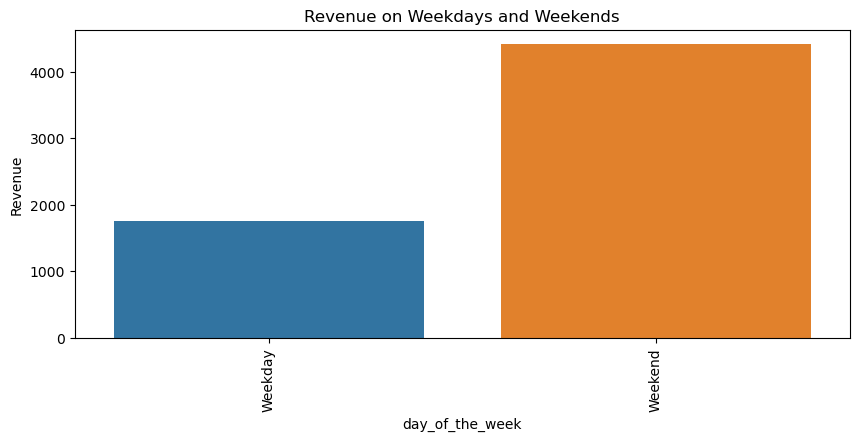

In [2082]:
#plot to analyze the revenue on weekdays and weekends
plt.figure(figsize=(10, 4))
plt.title('Revenue on Weekdays and Weekends')
sns.barplot(data=df_total_revenue_by_days,y='Revenue',x='day_of_the_week',hue='day_of_the_week')
plt.xticks(rotation=90);
plt.show()

- *Approx `72% of revenue(4411.968 dollars)` are genearted on weekends*

In [2084]:
#get the total revenue for top 10 restaurants and print it
total_revenue_by_restaurants = df.groupby('restaurant_name')['Revenue'].sum().sort_values(ascending=False).head(10)
print(total_revenue_by_restaurants)

#converting it into dataframe
df_total_revenue_by_restaurants=pd.DataFrame(total_revenue_by_restaurants)
df_total_revenue_by_restaurants.head(10)

restaurant_name
Shake Shack                 703.607
The Meatball Shop           419.829
Blue Ribbon Sushi           360.460
Blue Ribbon Fried Chicken   340.204
Parm                        218.557
RedFarm Broadway            191.468
RedFarm Hudson              180.934
TAO                         167.357
Han Dynasty                 149.398
Rubirosa                    140.809
Name: Revenue, dtype: float64


,Revenue
restaurant_name,
Shake Shack,703.607
The Meatball Shop,419.829
Blue Ribbon Sushi,360.460
Blue Ribbon Fried Chicken,340.204
Parm,218.557
RedFarm Broadway,191.468
RedFarm Hudson,180.934
TAO,167.357
Han Dynasty,149.398


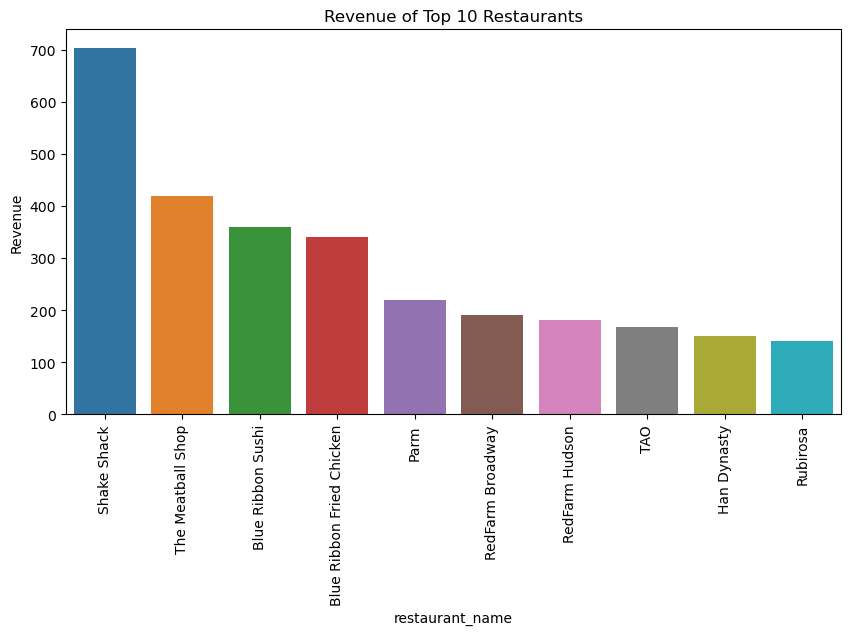

In [2085]:
#Create barplot for top 10 restaurants with orders placed in descending

plt.figure(figsize=(10,5))
plt.title('Revenue of Top 10 Restaurants')
sns.barplot(data = df_total_revenue_by_restaurants.head(10), x = 'restaurant_name',y='Revenue',hue='restaurant_name');
plt.xticks(rotation=90)
plt.show();

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [2087]:
#create a new column in the dataFrame to store this newly calculated total time 
#total_time= time taken to prepare food + delivery the food to customer and storing this result in new column
df['total_time'] = df['food_preparation_time'] + df['delivery_time'] 

# Calculate the total time taken to deliver food
total_time_gr_than_60=df['total_time']>60
df_total_time_gr_than_60=df[total_time_gr_than_60]   # dataframe with filter condition

#print the result
print('The total time taken to deliver food is :', df_total_time_gr_than_60.shape[0],'minutes') #instead of shape[] we can also use count() 


The total time taken to deliver food is : 200 minutes


In [2088]:
# Calculate percentage of orders which takes more than 60 minutes in the dataset
percentage_order_grThan_60=(df_total_time_gr_than_60.shape[0] / df.shape[0]) * 100

#print the result
print("Percentage of orders which take more than 60 minutes to delivered food is:", round(percentage_order_grThan_60, 2), '%') #rounding it to nearest decimal 2


Percentage of orders which take more than 60 minutes to delivered food is: 10.54 %


#### Observations:

- *`10.54% `of orders takes more than 60 minutes to delivered food*

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [2091]:
# Get and display the mean delivery time on weekdays 

delivery_weekday=df['day_of_the_week']=='Weekday'  #filter condition
df_delivery_weekday_mean=df[delivery_weekday]['delivery_time'].mean() #taking mean of delivery time on filtered dataframe
print('The mean delivery time on weekdays is around',round(df_delivery_weekday_mean),'minutes') #rounding to nearest minutes


The mean delivery time on weekdays is around 28 minutes


In [2092]:
# Get and display the mean delivery time on weekends 

delivery_weekend=df['day_of_the_week']=='Weekend'  #filter condition
df_delivery_weekend_mean=df[delivery_weekend]['delivery_time'].mean() #taking mean of delivery time on filtered dataframe
print('The mean delivery time on weekend is around',round(df_delivery_weekend_mean),'minutes') #rounding to nearest minutes


The mean delivery time on weekend is around 22 minutes


#### Observations:

- *The average delivery time on `weekdays(28 min)` is more as compared to `weekend(22 min)`. Increase in delivery time on weekday, suggests delivery done during rush hour like office/school/work hours.*

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Insights:

The Food hub is a food aggregator company which provides online food delivery services through their smartphone app. The app has access to multiple restaurants and help their millions of customers to place order from their favorite restaurant and have them at their doorsteps in no time.<br>
The dataset we have analyzed here, provides information about the different orders made by registered customers through their online portal from multiple restaurants.<br> The data contains information about approx. 2k different orders from 178 restaurants providing varieties of flavorful good foods from 14 different cuisines. The data also contains details about food preparation time and the time taken to deliver food to its customer on weekday & weekend.<br>
The main idea here is to understand the demand of different restaurants based on customers preferences as in what they order, when they order, and from where they order most often. 

### Conclusions:

Based on above analysis ,we have been able to conclude that -

- *There are `178` different restaurants providing varieties of flavorful good foods to `1200 customers`.*
  
- *`The Meatball Shop (4.512)` is the top-rated restaurant followed by `Blue Ribbon Fried Chicken` and `Shake Shack`.*
  
- *Whether it’s weekday or weekend `American` is the `most popular` cuisine out of 14 different cuisines listed in order of popularity-`American, Japanese, Italian ,Chinese, Mexican, Indian, Middle Eastern, Mediterranean, Thai,  French, Southern, Spanish, Korean, Vietnamese`*.

- *`American` ,`Japanese` and `Italian` are more known cuisines and have similar and moderate price range(11-23 dollars),which can be reason for customer spending more money on these cuisines, contributing around `70% of revenue.`*
- *`Korean and Vietnamese` which are little cheaper and more affordable, but still customers order less, suggesting less known cuisines or less demographics presence*.
- *Some cuisines like `Southern, French, Spanish` are pricier which can be associated with high-end dining and not and could be reason for a smaller number of orders*.
  
- *`Shake Shack` is the leading restaurant in `generating highest revenue` of approx `704 dollars(around 11%)`*
  
- *Demands for food is `higher on weekends` than on weekdays,contributing to `72% of revenue`.low demands on weekday suggest people order less on working day.*
  
- *On an average customer spends $17 per order on `most of the cuisines`.*
 
- *Delivery time is slightly `higher on weekdays` than on weekends, suggesting the traffic due to rush hours(office/work).*



### Recommendations:

Below are the recommendation to the business :

- *`Approx. 39%` of orders were not rated by the customers in this dataset.`Rating/Review` are very important factor in generating revenue and also paving path for the new customers.New customers often hesistate to order from low-rated/not rated restaurants,so by rewarding and encouraging the customers to leave valuable feedback/rating on their online app will not only benefit company in generating revenue but also boosts restaurants sales.*
  
- *There are `less demands for food on weekdays` than on weekends.We can segment the customers into groups like office workers,students and families and target them with special weekday deals like discounts, happy hours,special coupons applicable on weekdays only, half price meal etc*.
  
- *Monday and Fridays are the days when people tend to treat themselves with outside foods.Providing promotional offer on such days can attract more customers.* 
- *The `delivery time is little higher on weekdays` than on weekend which can be due to traffic/rush hours.We can improve this by optimize delivery routes, collaborating with more delivery partners and adding more delivery person.To analyze this more closely,additional data like order timestamps is needed,delivery location,distance etc*
  
- *Customer usually order small and regular meal on weekdays,attracting such customers with halfprice meals or combo offer can boost company sales*
  
- *`Indroducing Loyalty Programs` for the customers to earned points on their orders and reward them after certain threshold.*
  
- *Rewarding the new customer with free delivery on their first order.*
  
- *We also noticed there are `low demands on less known cuisine`, by advertising/marketing it aggressively and providing recommendations based on customers’ tastes can broaden their choices and increase revenue of the company.Promotional offers for the first time customers to introduce them to new flavors*.

Further we have to dig more to get informations on different variable like order timestamp(to get more info on data span),location,distance, demographics etc, in order to boost company revenues on weekdays and also why there are less demands for some cuisines inspite of good rating. 
